In [2]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#read the data
data=pd.read_csv('train.csv')
jokes=pd.read_csv('jokes.csv')

In [4]:
data.head()

,id,user_id,joke_id,Rating
0,31030_110,31030,110,2.750
1,16144_109,16144,109,5.094
2,23098_6,23098,6,-6.438
3,14273_86,14273,86,4.406
4,18419_134,18419,134,9.375


In [5]:
jokes.head()

,joke_id,joke_text
0,1,Q. What's O. J. Simpson's web address? A. Slas...
1,2,How many feminists does it take to screw in a ...
2,3,Q. Did you hear about the dyslexic devil worsh...
3,4,They asked the Japanese visitor if they have e...
4,5,Q: What did the blind person say when given so...


In [6]:
#merging the two data frames into a single dataframe data
data=data.merge(jokes,how='left',on='joke_id')
data.head()

,id,user_id,joke_id,Rating,joke_text
0,31030_110,31030,110,2.750,"Judy was having trouble with her computer, so ..."
1,16144_109,16144,109,5.094,One day the first grade teacher was reading th...
2,23098_6,23098,6,-6.438,Q. What is orange and sounds like a parrot? A....
3,14273_86,14273,86,4.406,Two attorneys went into a diner and ordered tw...
4,18419_134,18419,134,9.375,A man is driving in the country one evening wh...


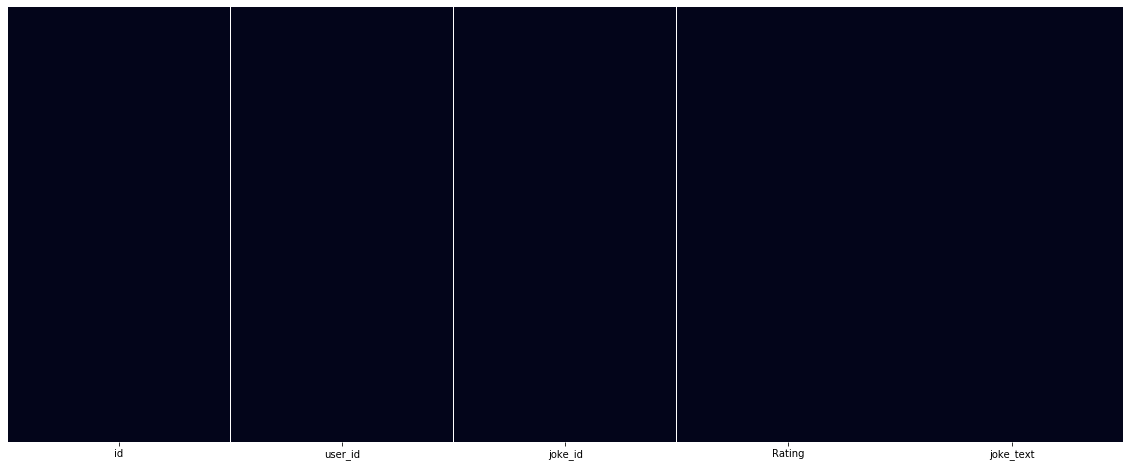

In [7]:
plt.figure(figsize=(20,8))
sns.heatmap(data.isnull(),cbar=False,yticklabels=False)

In [8]:
data['Rating'].nunique()

641

In [9]:
#removing any special characters from the text
data['joke_text']=data['joke_text'].str.replace('\W',' ')

In [10]:
data.head()

,id,user_id,joke_id,Rating,joke_text
0,31030_110,31030,110,2.750,Judy was having trouble with her computer so ...
1,16144_109,16144,109,5.094,One day the first grade teacher was reading th...
2,23098_6,23098,6,-6.438,Q What is orange and sounds like a parrot A ...
3,14273_86,14273,86,4.406,Two attorneys went into a diner and ordered tw...
4,18419_134,18419,134,9.375,A man is driving in the country one evening wh...


In [11]:
#importing all the necessary libraries required for performing NLP
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()


In [12]:
#using the lemmatizer to convert all the words back to their original form
data['joke_text']=data['joke_text'].apply(lemmatizer.lemmatize)

In [13]:
#using a tfidf vectorizer 
tfidf=TfidfVectorizer(stop_words='english',lowercase=True)

In [14]:
#Splitting the data into training and testing sst
from sklearn.model_selection import train_test_split
X=data['joke_text']
y=data['Rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [15]:
X_train=tfidf.fit_transform(X_train)
X_test=tfidf.transform(X_test)

In [16]:
#importing all our models to predict the joke ratings
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [17]:
lr=LinearRegression()
rd=RandomForestRegressor(n_estimators = 100, oob_score = True, n_jobs = -1,max_features = "auto", min_samples_leaf = 10)
dt=DecisionTreeRegressor()


In [18]:
#training our models
lr.fit(X_train,y_train)

#dt.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
#Predicting the rating of the testing set
lrp=lr.predict(X_test)

#dtp=dt.predict(X_test)



In [22]:
from sklearn.metrics import mean_squared_error
print('Linear regression::',np.sqrt(mean_squared_error(y_test,lrp)))


Linear regression:: 4.962018815192784
